<a href="https://colab.research.google.com/github/aidawm/new_repo/blob/main/transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

--2021-05-28 05:17:30--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 74.125.31.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   118MB/s    in 0.7s    

2021-05-28 05:17:31 (118 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [3]:
local_weight_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


pre_trained_model = InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)
pre_trained_model.load_weights(local_weight_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 7, 7, 768)


In [4]:
from tensorflow.keras.optimizers import RMSprop

x= layers.Flatten()(last_output)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1,activation='sigmoid')(x)

model = Model(pre_trained_model.input,x)

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-05-28 05:17:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.211.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   123MB/s    in 1.2s    

2021-05-28 05:17:40 (123 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-05-28 05:17:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

In [21]:
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/horse-or-human.zip'
zip_ref=  zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()


local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref=  zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

train_horse = os.path.join('/tmp/horse-or-human/horses')
train_human = os.path.join('/tmp/horse-or-human/humans')
valid_horse = os.path.join('/tmp/validation-horse-or-human/horses')
valid_human = os.path.join('/tmp/validation-horse-or-human/humans')
#type = str

train_horse_name = os.listdir(train_horse)
train_human_name = os.listdir(train_human)
valid_horse_name = os.listdir(valid_horse)
valid_human_name = os.listdir(valid_human)
#type = list


train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/',target_size=(150,150),batch_size=128,class_mode='binary',)
valid_generator = valid_datagen.flow_from_directory('/tmp/validation-horse-or-human/',target_size=(150,150),batch_size=32,class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [22]:
history=model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1,validation_data=valid_generator,validation_steps=8)

Epoch 1/15
8/8 [==============================] - 55s 7s/step - loss: 0.7148 - accuracy: 0.7753 - val_loss: 0.0564 - val_accuracy: 0.9688
Epoch 2/15
8/8 [==============================] - 54s 7s/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0445 - val_accuracy: 0.9766
Epoch 3/15
8/8 [==============================] - 53s 8s/step - loss: 0.0544 - accuracy: 0.9800 - val_loss: 0.0093 - val_accuracy: 0.9961
Epoch 4/15
8/8 [==============================] - 53s 7s/step - loss: 0.0256 - accuracy: 0.9900 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 5/15
8/8 [==============================] - 53s 7s/step - loss: 0.0224 - accuracy: 0.9944 - val_loss: 0.0128 - val_accuracy: 0.9922
Epoch 6/15
8/8 [==============================] - 53s 7s/step - loss: 0.0249 - accuracy: 0.9900 - val_loss: 0.4457 - val_accuracy: 0.8945
Epoch 7/15
8/8 [==============================] - 53s 7s/step - loss: 0.0813 - accuracy: 0.9733 - val_loss: 0.0110 - val_accuracy: 0.9922
Epoch 8/15
8/8 [==================

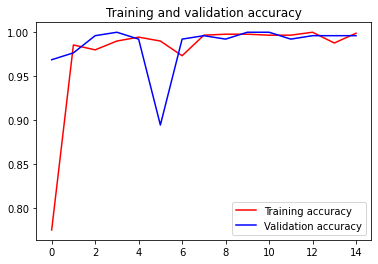

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()